# Finite Difference Method for Solving ODEs


In [37]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import math

In [38]:
def errors(true_values, test_values):
    m = len(true_values)
    mse = 0
    mae = 0
    mx = 0
    for i in range(m):
        mse += (true_values[i] - test_values[i]) ** 2
        mae += abs(true_values[i] - test_values[i])
        mx = max(abs(true_values[i] - test_values[i]), mx)
    mse = math.sqrt(mse / m / (m - 1))
    mae /= m
    print(f"MSE: {mse}, MAE: {mae}, MAX: {mx}")

In [39]:
def tester(x_points, solution_points, test_points, label):
    plt.figure(figsize=(17, 8))
    plt.plot(x_points, solution_points, label='exact sol')
    plt.plot(x_points, test_points, label=label)
    plt.legend()
    plt.ylabel('u')
    plt.xlabel('x')
    plt.grid()

    errors(solution_points, test_points)

In [40]:
var('x u v w')
# Substitute w=u'', v=u'
eq = w + (1/(1 + x**2)) * (x*v - u -
                           ((4*x**2 - 2*x + 3) / (1 + x**2))*exp(-2*x))
eq

w + (-u + v*x - (4*x**2 - 2*x + 3)*exp(-2*x)/(x**2 + 1))/(x**2 + 1)

In [41]:
a = 0
b = 1
solution = sqrt(1 + x**2) + exp(-2*x)
solution

sqrt(x**2 + 1) + exp(-2*x)

In [42]:
n = 21
h = (b - a) / (n - 1)
x_points = [a + h * i for i in range(n)]
solution_points = [solution.subs({x: t}).evalf() for t in x_points]
solution_points

[2.00000000000000,
 1.90608663776100,
 1.82371831519007,
 1.75200564148955,
 1.69012394875420,
 1.63730706611705,
 1.59284228698508,
 1.55606630881226,
 1.52636192554412,
 1.50315526971366,
 1.48591342992134,
 1.47414230474941,
 1.46738459088126,
 1.46521783722167,
 1.46725252551498,
 1.47313016014843,
 1.48252136548123,
 1.49512399889340,
 1.51066129292896,
 1.52888004163601,
 1.54954884560971]

In [43]:
var('back center next')
eqi = expand(eq.subs([(w, (back - 2 * center + next) / h / h),
             (v, (next - back) / 2 / h), (u, center)]))
eqi

-10.0*back*x/(x**2 + 1) + 400.0*back - 800.0*center - center/(x**2 + 1) + 10.0*next*x/(x**2 + 1) + 400.0*next - 4*x**2/(x**4*exp(2*x) + 2*x**2*exp(2*x) + exp(2*x)) + 2*x/(x**4*exp(2*x) + 2*x**2*exp(2*x) + exp(2*x)) - 3/(x**4*exp(2*x) + 2*x**2*exp(2*x) + exp(2*x))

In [44]:
mx = np.zeros((n, 4))
mx[0] = [0, h + 1, -1, 0]

In [45]:
mx[0] = [0, 2*h + 1, -1, 6*h]
for i in range(1, n - 1):
    col = collect(eqi.subs({x: x_points[i]}), [
                  back, center, next], evaluate=False)
    print(col)
    mx[i] = [col[back], col[center], col[next], -col[1]]
mx[n - 1] = [0, 1, 0, 1.5495]

{back: 399.501246882793, next: 400.498753117207, center: -800.997506234414, 1: -2.61996070818927}
{back: 399.009900990099, next: 400.990099009901, center: -800.990099009901, 1: -2.27937980466765}
{back: 398.533007334963, next: 401.466992665037, center: -800.977995110024, 1: -1.97692059296823}
{back: 398.076923076923, next: 401.923076923077, center: -800.961538461538, 1: -1.71050603463236}
{back: 397.647058823529, next: 402.352941176471, center: -800.941176470588, 1: -1.47750029217195}
{back: 397.247706422018, next: 402.752293577982, center: -800.917431192661, 1: -1.27490961671535}
{back: 396.881959910913, next: 403.118040089087, center: -800.890868596882, 1: -1.09957628986208}
{back: 396.551724137931, next: 403.448275862069, center: -800.862068965517, 1: -0.948345911186764}
{back: 396.257796257796, next: 403.742203742204, center: -800.831600831601, 1: -0.818196816123819}
{back: 396.000000000000, next: 404.000000000000, center: -800.800000000000, 1: -0.706328527049169}
{back: 395.777351

In [46]:
s = np.zeros(n, dtype=float)
s[0] = -mx[0][2] / mx[0][1]
t = np.zeros(n, dtype=float)
t[0] = mx[0][3] / mx[0][1]

In [47]:
for i in range(1, n):
    s[i] = -mx[i][2] / (mx[i][1] + mx[i][0] * s[i - 1])
    t[i] = (mx[i][3] - mx[i][0] * t[i - 1]) / (mx[i][0] * s[i - 1] + mx[i][1])

In [48]:
y = np.zeros(n, dtype=float)
y[-1] = t[-1]
s[-1] = 0
for i in range(n - 2, -1, -1):
    y[i] = s[i] * y[i + 1] + t[i]
y = y.tolist()

MSE: 0.008193797494448492, MAE: 0.0333629801259981, MAX: 0.0505103911266591


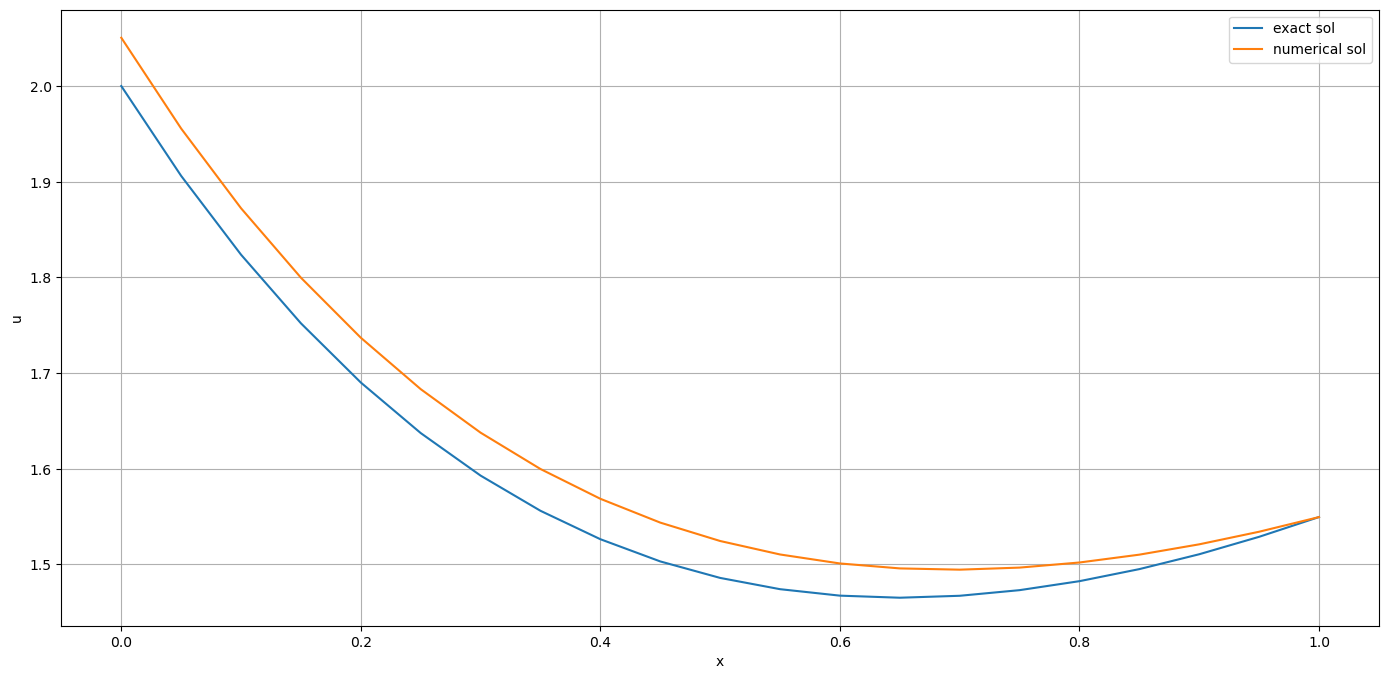

In [49]:
tester(x_points, solution_points, y, 'numerical sol')

In [50]:
eq0 = back * (4 * h + 3) - 4 * center + next - 12*h
eq1 = eqi.subs({x: x_points[1]})
col1 = collect(eq1, [back, center, next], evaluate=False)
col0 = collect(eq0.subs({next: -(col1[1] + col1[back] * back + col1[center] * center) / col1[next]}), [back, center],
               evaluate=False)
col0

{back: 2.20249066002491, center: -2.00000000000000, 1: -0.593458255018780}

In [51]:
mx = np.zeros((n, 4))
mx[0] = [0, col0[back], col0[center], -col0[1]]
for i in range(1, n - 1):
    col = collect(eqi.subs({x: x_points[i]}), [
                  back, center, next], evaluate=False)
    mx[i] = [col[back], col[center], col[next], -col[1]]
mx[n - 1] = [0, 1, 0, 1.5495]

In [52]:
s = np.zeros(n, dtype=float)
s[0] = -mx[0][2] / mx[0][1]
t = np.zeros(n, dtype=float)
t[0] = mx[0][3] / mx[0][1]
for i in range(1, n):
    s[i] = -mx[i][2] / (mx[i][1] + mx[i][0] * s[i - 1])
    t[i] = (mx[i][3] - mx[i][0] * t[i - 1]) / (mx[i][0] * s[i - 1] + mx[i][1])


# explain Thomas algorithm

In [53]:
y = np.zeros(n, dtype=float)
y[-1] = t[-1]
s[-1] = 0
for i in range(n - 2, -1, -1):
    y[i] = s[i] * y[i + 1] + t[i]
y = y.tolist()

MSE: 0.00435851729035298, MAE: 0.0182269198958886, MAX: 0.0248666798838357


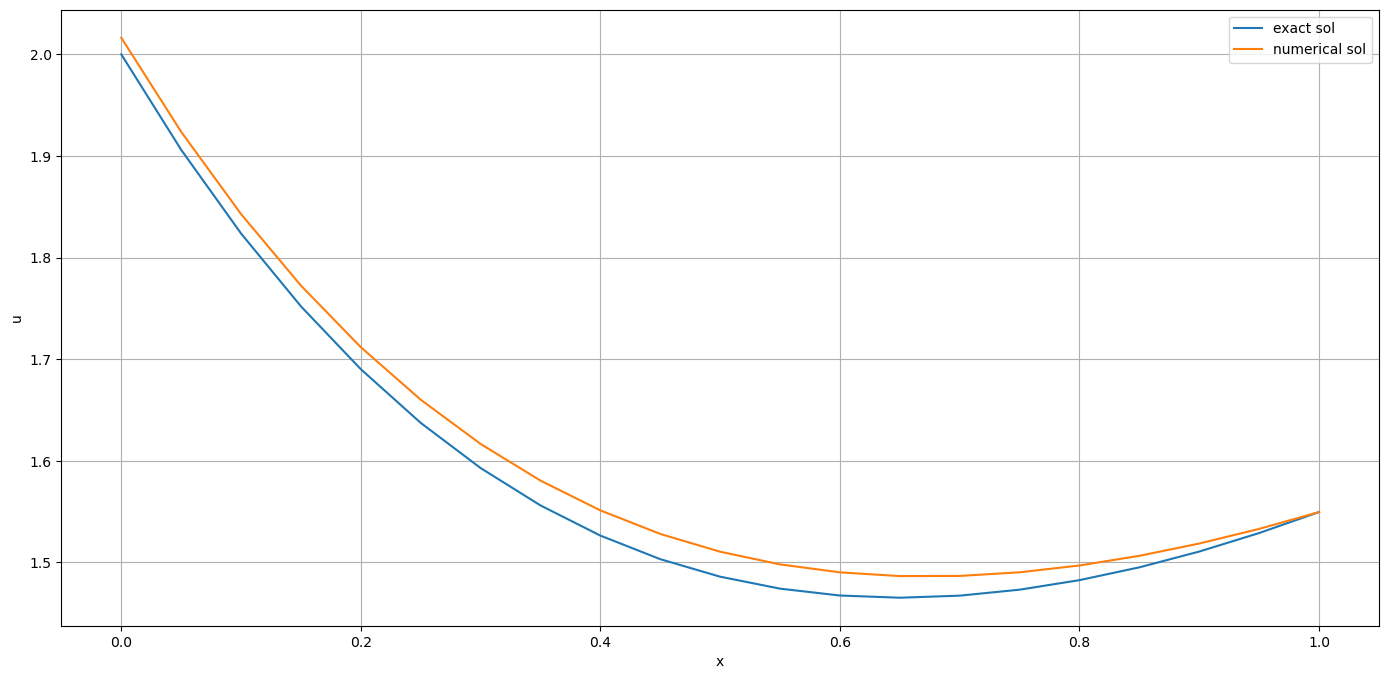

In [54]:
tester(x_points, solution_points, y, 'numerical sol')